1. Data source: https://www.kaggle.com/nasa/kepler-exoplanet-search-results
2. Column explenation (not complete): https://kepler-exoplanets.readthedocs.io/en/latest/dataset.html
3. Column explenation (from a repo): https://github.com/bnarath/find_Exoplanet
4. Column explenation (NASA web): https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

# Data Exploration

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 

sns.set()
%matplotlib inline

In [7]:
df_original = pd.read_csv('cumulative.csv', sep=',')
df_original.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


### An overview of the original data 

In [6]:
df_original.shape

(9564, 50)

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [7]:
df_original.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [9]:
df_trimmed = df_original[['kepoi_name', 'koi_disposition', 'koi_pdisposition', 
                 'koi_score', 'koi_period', 'koi_time0bk', 'koi_impact', 
                 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 
                 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad']]
df_trimmed.head()

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
0,K00752.01,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927
1,K00752.02,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927
2,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791
4,K00755.01,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046


In [10]:
df_trimmed.isnull().sum()

kepoi_name             0
koi_disposition        0
koi_pdisposition       0
koi_score           1510
koi_period             0
koi_time0bk            0
koi_impact           363
koi_duration           0
koi_depth            363
koi_prad             363
koi_teq              363
koi_insol            321
koi_steff            363
koi_slogg            363
koi_srad             363
dtype: int64

In [11]:
df = df_trimmed.dropna()
df.isnull().sum()

kepoi_name          0
koi_disposition     0
koi_pdisposition    0
koi_score           0
koi_period          0
koi_time0bk         0
koi_impact          0
koi_duration        0
koi_depth           0
koi_prad            0
koi_teq             0
koi_insol           0
koi_steff           0
koi_slogg           0
koi_srad            0
dtype: int64

In [12]:
df.head()

,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
0,K00752.01,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927
1,K00752.02,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927
2,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868
3,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791
4,K00755.01,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046


In [13]:
df.shape

(7995, 15)

In [14]:
df.duplicated().sum()

0

In [12]:
#sns.pairplot(data = df)

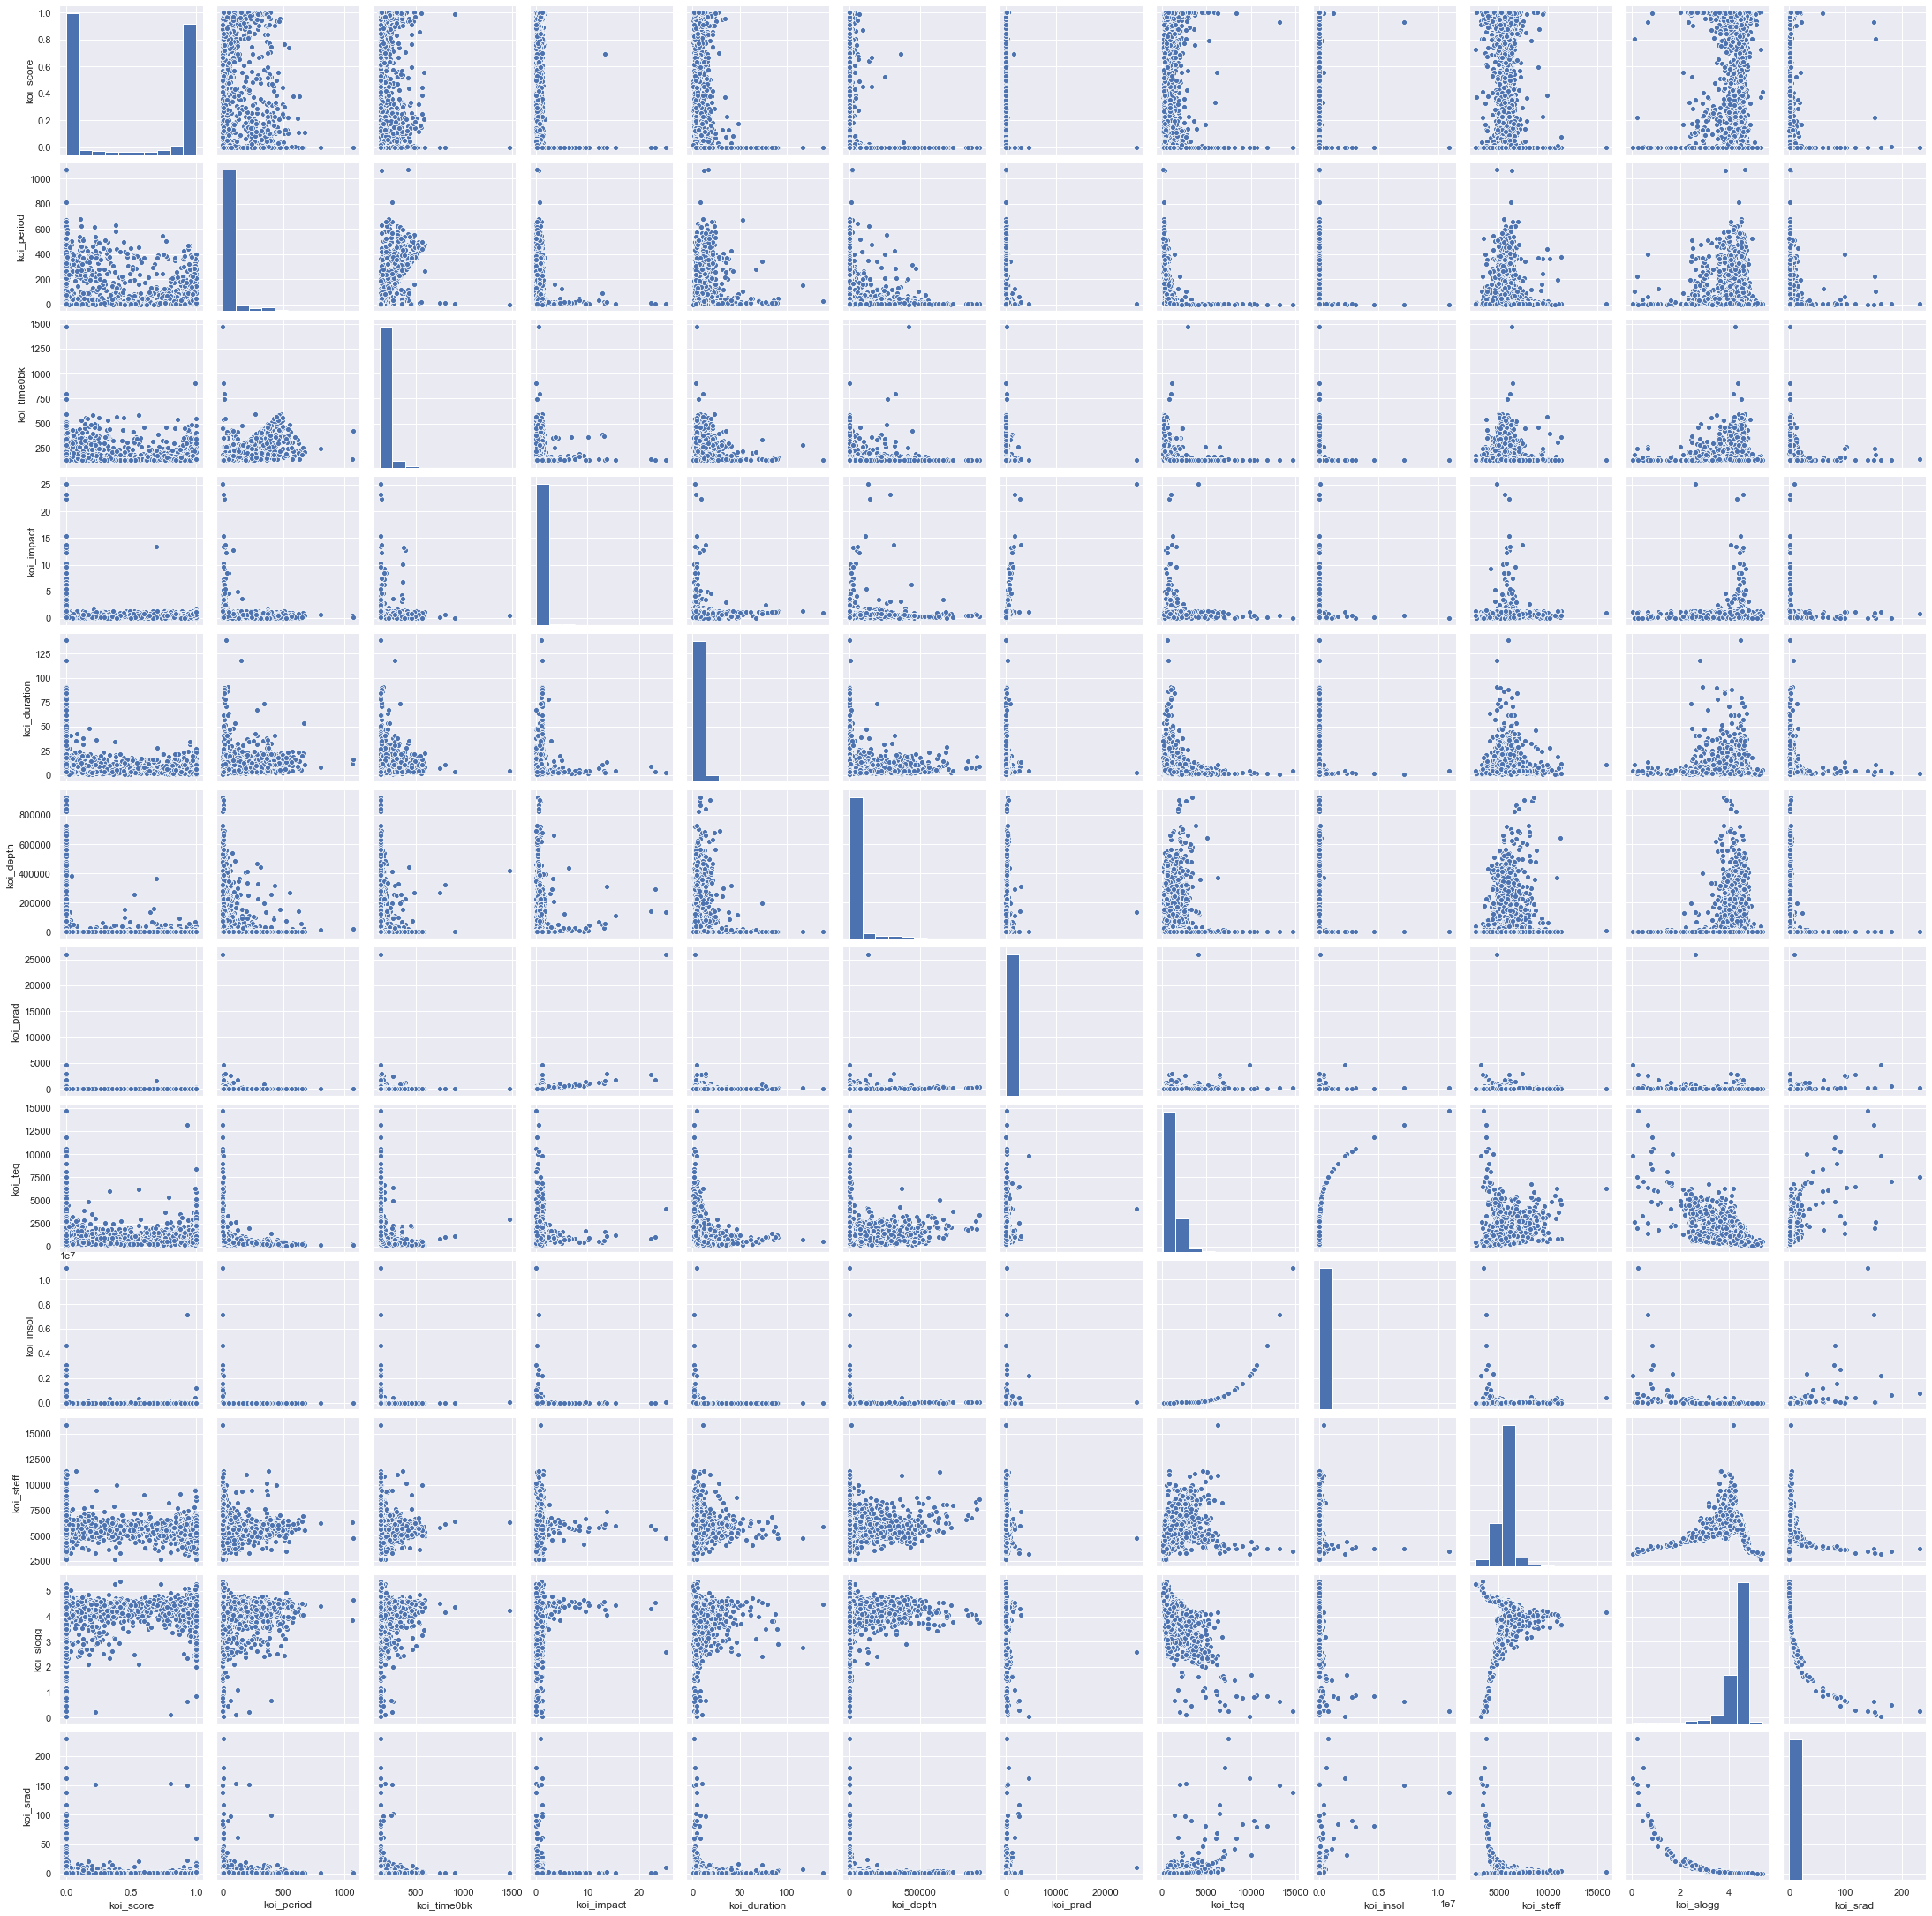

In [15]:
sns.pairplot(df);

In [16]:
df.corr()

,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
koi_score,1.000000,-0.072374,-0.009718,-0.214340,-0.174312,-0.301010,-0.076870,-0.302279,-0.030878,-0.192544,0.150017,-0.071767
koi_period,-0.072374,1.000000,0.615667,-0.035417,0.351163,-0.047817,-0.012370,-0.350038,-0.019818,0.024013,-0.050274,0.013889
koi_time0bk,-0.009718,0.615667,1.000000,0.004697,0.204914,-0.044452,-0.006004,-0.273712,-0.019060,-0.004461,0.008028,-0.003103
koi_impact,-0.214340,-0.035417,0.004697,1.000000,0.057802,0.055693,0.523648,0.052119,-0.008267,0.075944,-0.028780,0.000100
koi_duration,-0.174312,0.351163,0.204914,0.057802,1.000000,0.088747,0.021313,-0.185406,-0.017982,0.108272,-0.135814,0.014583
koi_depth,-0.301010,-0.047817,-0.044452,0.055693,0.088747,1.000000,0.094761,0.075837,-0.007021,0.135131,-0.020647,-0.016099
koi_prad,-0.076870,-0.012370,-0.006004,0.523648,0.021313,0.094761,1.000000,0.118662,0.044517,-0.004234,-0.158696,0.154519
koi_teq,-0.302279,-0.350038,-0.273712,0.052119,-0.185406,0.075837,0.118662,1.000000,0.431025,0.254841,-0.575401,0.457682
koi_insol,-0.030878,-0.019818,-0.019060,-0.008267,-0.017982,-0.007021,0.044517,0.431025,1.000000,-0.060570,-0.297286,0.534150
koi_steff,-0.192544,0.024013,-0.004461,0.075944,0.108272,0.135131,-0.004234,0.254841,-0.060570,1.000000,-0.156020,-0.117692


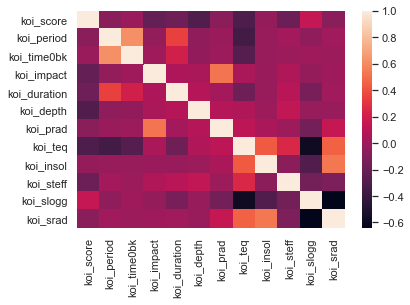

In [17]:
sns.heatmap(df.corr())

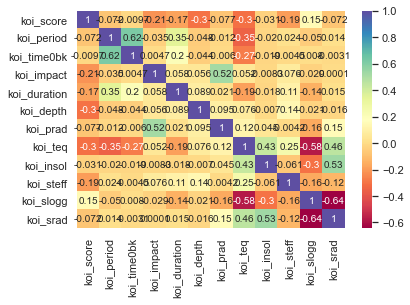

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral')

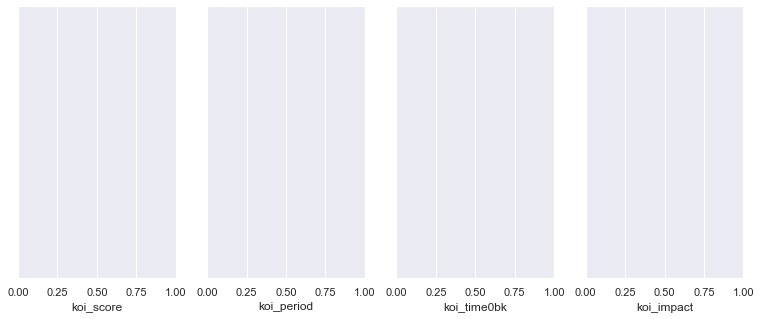

In [10]:
df = pd.read_csv('cumulative.csv')
df = df.dropna()

f, axes = plt.subplots(1, 4, figsize=(13,5))

ax = sns.boxplot(data=df, x='koi_score', ax=axes[0]);
ax = sns.boxplot(data=df, x='koi_period', ax=axes[1]);
ax = sns.boxplot(data=df, x='koi_time0bk', ax=axes[2]);
ax = sns.boxplot(data=df, x='koi_impact', ax=axes[3]);



In [11]:
df = pd.get_dummies(df, columns=['koi_disposition', 'koi_pdisposition'], drop_first=True)
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
